In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Titanic dataset   
#### Source:  
biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls   
http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets   

#### Data Set Information:    
The titanic3 dataset describes the survival status of individual passengers on the Titanic.  The titanic3 dataset does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers.  Thomas Cason of UVa has greatly updated and improved the titanic dataset using the Encyclopedia Titanica and created a new dataset called titanic3.   

#### Attribute Information:     
    pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)    
    survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target  
    name: A field rich in information as it contains title and family names  
    sex: male/female   
    age: Age, asignificant portion of values aremissing  
    sibsp: Number of siblings/spouses aboard  
    parch: Number of parents/children aboard  
    ticket: Ticket number   
    fare: Passenger fare (British Pound)  
    cabin: Doesthe location of the cabin influence chances of survival?  
    embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  
    boat: Lifeboat, many missing values  
    body: Body Identification Number  
    home.dest: Home/destination  

SPECIAL NOTES
pclass: A proxy for socio-economic status (SES)   
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5   

sibsp: The dataset defines family relations in this way:    
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way:    
Parent = mother, father   
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.    
 
Fare is in Pre-1970 British Pounds   
Conversion Factors: 1 = 12s = 240d and 1s = 20d  

In [2]:
dataset_name = 'titanic3'

In [3]:
file_path = '~/data/titanic/'
file_name = 'titanic3.csv'
file = file_path + file_name
df = pd.read_csv(file)
df.shape

(1309, 14)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [356]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [357]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [358]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [359]:
# survival rate by pclass and sex
df.groupby(['pclass', 'sex']).mean()[['survived']]

survived
pclass sex             
1      female  0.965278
       male    0.340782
2      female  0.886792
       male    0.146199
3      female  0.490741
       male    0.152130

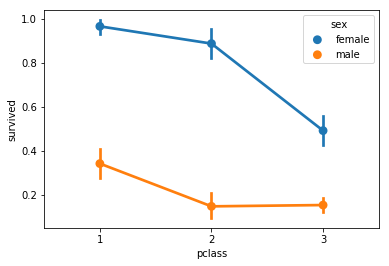

In [361]:
sns.pointplot(x='pclass', y='survived', hue='sex', data=df)
plt.savefig(dataset_name + '_pointplot.png')
plt.show()

In [362]:
# survival rate for each pclass
df.groupby(['pclass']).mean()[['survived']]

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [363]:
# survival rate overall by pclass
x = df.groupby(['pclass']).mean()[['survived']]
x['survived'] = x['survived']/x['survived'].sum()
x

,survived
pclass,
1,0.474811
2,0.329428
3,0.195761


In [364]:
# survival rate for each sex
df.groupby(['sex']).mean()[['survived']]

,survived
sex,
female,0.727468
male,0.190985


In [365]:
# survival rate overall by sex
x = df.groupby(['sex']).mean()[['survived']]
x['survived'] = x['survived']/x['survived'].sum()
x

,survived
sex,
female,0.792058
male,0.207942


In [366]:
# survival rate for each sibsp
df.groupby(['sibsp']).mean()[['survived']].sort_values(by='survived', ascending=False)

,survived
sibsp,
1,0.510972
2,0.452381
0,0.346801
3,0.300000
4,0.136364
5,0.000000
8,0.000000


In [367]:
# survival rate overall by sibsp
x = df.groupby(['sibsp']).mean()[['survived']].sort_values(by='survived', ascending=False)
x['survived'] = x['survived']/x['survived'].sum()
x

,survived
sibsp,
1,0.292566
2,0.259019
0,0.198567
3,0.171770
4,0.078077
5,0.000000
8,0.000000


In [368]:
# survival rate for each parch
df.groupby(['parch']).mean()[['survived']].sort_values(by='survived', ascending=False)

,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000


In [369]:
# survival rate overall by parch
x = df.groupby(['parch']).mean()[['survived']].sort_values(by='survived', ascending=False)
x['survived'] = x['survived']/x['survived'].sum()
x

,survived
parch,
3,0.261909
1,0.246503
2,0.211382
0,0.140521
4,0.069842
5,0.069842
6,0.000000
9,0.000000


In [370]:
# survival rate for each embarked
df.groupby(['embarked']).mean()[['survived']].sort_values(by='survived', ascending=False)

,survived
embarked,
C,0.555556
Q,0.357724
S,0.332604


In [371]:
# survival rate overall by embarked
x = df.groupby(['embarked']).mean()[['survived']].sort_values(by='survived', ascending=False)
x['survived'] = x['survived']/x['survived'].sum()
x

,survived
embarked,
C,0.445913
Q,0.287125
S,0.266962


In [372]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [373]:
(df.isnull() | df.isna()).sum() 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [374]:
# attributes to keep
attributes = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[attributes]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [375]:
# embarked (2 bad or missing data points) - fill with the most common value
fill_value = df['embarked'].value_counts().idxmax()
df['embarked'] = df['embarked'].fillna(fill_value)

In [376]:
df['embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: embarked, dtype: object

In [377]:
# convert embarked to numeric values
x = {'S':1, 'C':2, 'Q':3}
df['embarked'] = df['embarked'].map(x)

In [378]:
df['embarked'].describe()

count    1309.000000
mean        1.394194
std         0.653499
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: embarked, dtype: float64

In [379]:
# convert embarked column to individual columns
# embarked_list = df['embarked'].unique()

# for embarked in embarked_list:
#     name = 'embarked_' + embarked
#     df[name] = np.where(df['embarked'] == embarked, 1, 0)
    
# df = df.drop('embarked', axis=1)

In [380]:
# fare (1 bad or missing data point)
df[df['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1225,3,0,male,60.5,0,0,NaN,1


In [381]:
df.groupby('pclass').mean()[['fare']]

,fare
pclass,
1,87.508992
2,21.179196
3,13.302889


In [382]:
df.groupby(['pclass', 'sex']).mean()[['fare']]

fare
pclass sex               
1      female  109.412385
       male     69.888385
2      female   23.234827
       male     19.904946
3      female   15.324250
       male     12.415462

In [383]:
mean = df.groupby(['pclass', 'sex']).mean()['fare']
df['fare'] = df['fare'].fillna(mean[5])

In [385]:
df['fare'].describe()

count    1309.000000
mean       33.279528
std        51.742098
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [386]:
# age (263 bad or missing data points)
# fill bad value using a random value based on mean age and 
# standard deviation for each pclass/sex subset
df.groupby(['pclass', 'sex']).mean()[['age']]

age
pclass sex              
1      female  37.037594
       male    41.029272
2      female  27.499223
       male    30.815380
3      female  22.185329
       male    25.962264

In [387]:
mean = df.groupby(['pclass', 'sex']).mean()['age']
mean.values

array([37.03759398, 41.02927152, 27.4992233 , 30.81537975, 22.18532895,
       25.96226361])

In [388]:
std = df.groupby(['pclass', 'sex']).std()['age']
std.values

array([14.27246024, 14.57852919, 12.91174657, 13.97740017, 12.20525432,
       11.68241503])

In [389]:
nulls = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.isnull().sum())
nulls.values

array([ 11,  28,   3,  13,  64, 144])

In [390]:
# create a list of random age arrays for each subset
rand_ages = []
for i in range(len(mean)):
    rand_ages.append(np.random.randint(mean.values[i] - std.values[i], mean.values[i] + std.values[i], size = nulls.values[i]))

In [391]:
# overwrite the null values
df.loc[(df.age.isnull()) & (df.sex == 'female') & (df.pclass == 1), 'age'] = rand_ages[0]
df.loc[(df.age.isnull()) & (df.sex == 'male'  ) & (df.pclass == 1), 'age'] = rand_ages[1]
df.loc[(df.age.isnull()) & (df.sex == 'female') & (df.pclass == 2), 'age'] = rand_ages[2]
df.loc[(df.age.isnull()) & (df.sex == 'male'  ) & (df.pclass == 2), 'age'] = rand_ages[3]
df.loc[(df.age.isnull()) & (df.sex == 'female') & (df.pclass == 3), 'age'] = rand_ages[4]
df.loc[(df.age.isnull()) & (df.sex == 'male'  ) & (df.pclass == 3), 'age'] = rand_ages[5]

In [392]:
df['age'].describe()

count    1309.000000
mean       29.173163
std        13.595661
min         0.170000
25%        21.000000
50%        28.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [393]:
# convert sex to a numeric value
df['sex'] = np.where(df['sex']=='female', 1, 0)

In [394]:
df['sex'].describe()

count    1309.000000
mean        0.355997
std         0.478997
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [397]:
filename = 'titanic3'
outfile = open(filename,'wb')
pickle.dump(df,outfile)
outfile.close()

# filename = 'titanic3'
# infile = open(filename,'rb')
# df = pickle.load(infile)
# infile.close()

In [434]:
# get the feature names to make plotting easier
feature_names = list(df.columns.values)
feature_names.remove('survived')

Survived:         500
Did not survive:  809


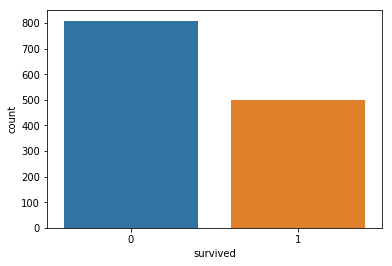

In [413]:
# get the number of samples based on survival
num_survivied = df[df['survived'] == 1].shape[0]
num_died = df[df['survived'] == 0].shape[0]

print('Survived:        ', num_survivied)
print('Did not survive: ', num_died)

sns.countplot(x='survived', data=df)
plt.savefig(dataset_name + '_countplot.png')
plt.show()

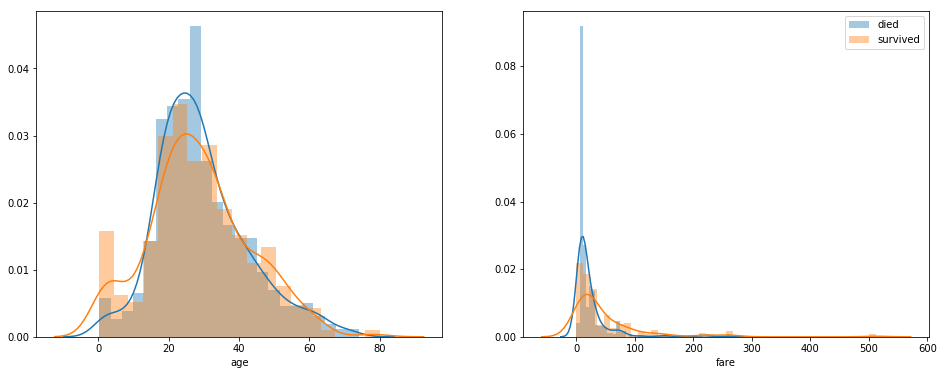

In [460]:
features = ['age', 'fare']

num_plots = len(features)
num_columns = 2
num_rows = math.ceil(num_plots/num_columns) # round up

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,6))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.distplot(df[df['survived']==0][name], ax=axs[index])
        sns.distplot(df[df['survived']==1][name], ax=axs[index])
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[df['survived']==0][name], ax=axs[row][col])
        sns.distplot(df[df['survived']==1][name], ax=axs[row][col])
plt.legend(['died','survived'])
plt.savefig(dataset_name + '_distplots_by_survived.png')  
plt.show()

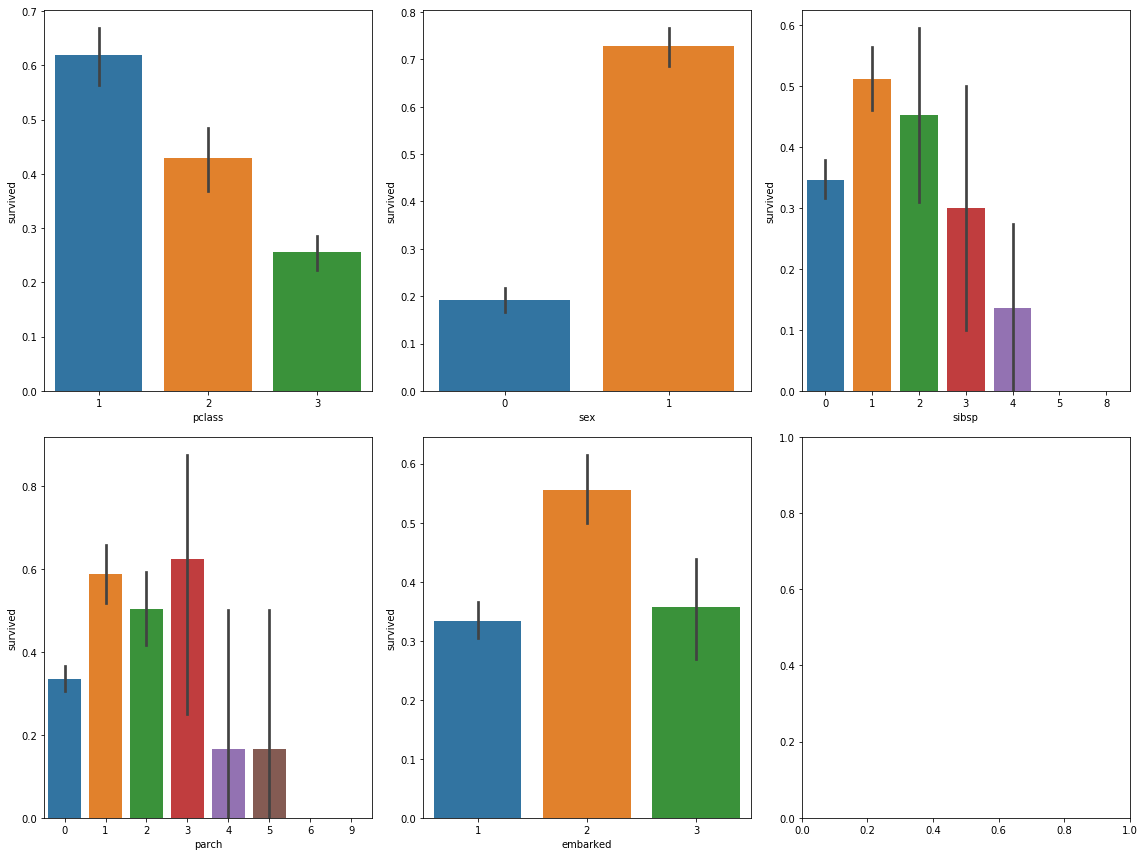

In [452]:
features = list(df.columns.values)
features.remove('survived')
features.remove('age')
features.remove('fare')

num_plots = len(features)
num_columns = 3
num_rows = math.ceil(num_plots/num_columns) # round up
y_value = 'survived'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,12))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.barplot(x=name, y=y_value, data=df, ax=axs[index])
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.barplot(x=name, y=y_value, data=df, ax=axs[row][col])
plt.tight_layout()
plt.savefig(dataset_name + '_barplots.png')  
plt.show()

In [461]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.312469,-0.124617,-0.446682,0.060832,0.018322,-0.558702,0.038875
survived,-0.312469,1.000000,0.528693,-0.027939,-0.027825,0.082660,0.244435,0.098450
sex,-0.124617,0.528693,1.000000,-0.070451,0.109609,0.213125,0.185702,0.120423
age,-0.446682,-0.027939,-0.070451,1.000000,-0.209287,-0.131392,0.200421,-0.033123
sibsp,0.060832,-0.027825,0.109609,-0.209287,1.000000,0.373587,0.160362,-0.073461
parch,0.018322,0.082660,0.213125,-0.131392,0.373587,1.000000,0.221645,-0.095523
fare,-0.558702,0.244435,0.185702,0.200421,0.160362,0.221645,1.000000,0.061300
embarked,0.038875,0.098450,0.120423,-0.033123,-0.073461,-0.095523,0.061300,1.000000


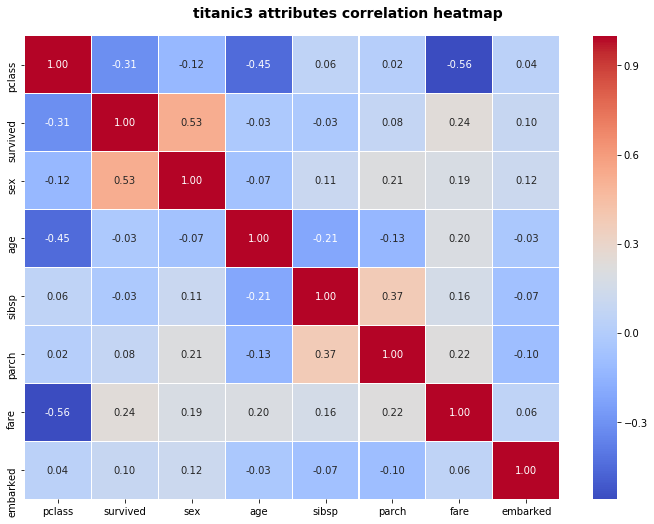

In [462]:
fig, (ax) = plt.subplots(1, 1, figsize=(12,8))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle(dataset_name + ' attributes correlation heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png')  
plt.show()

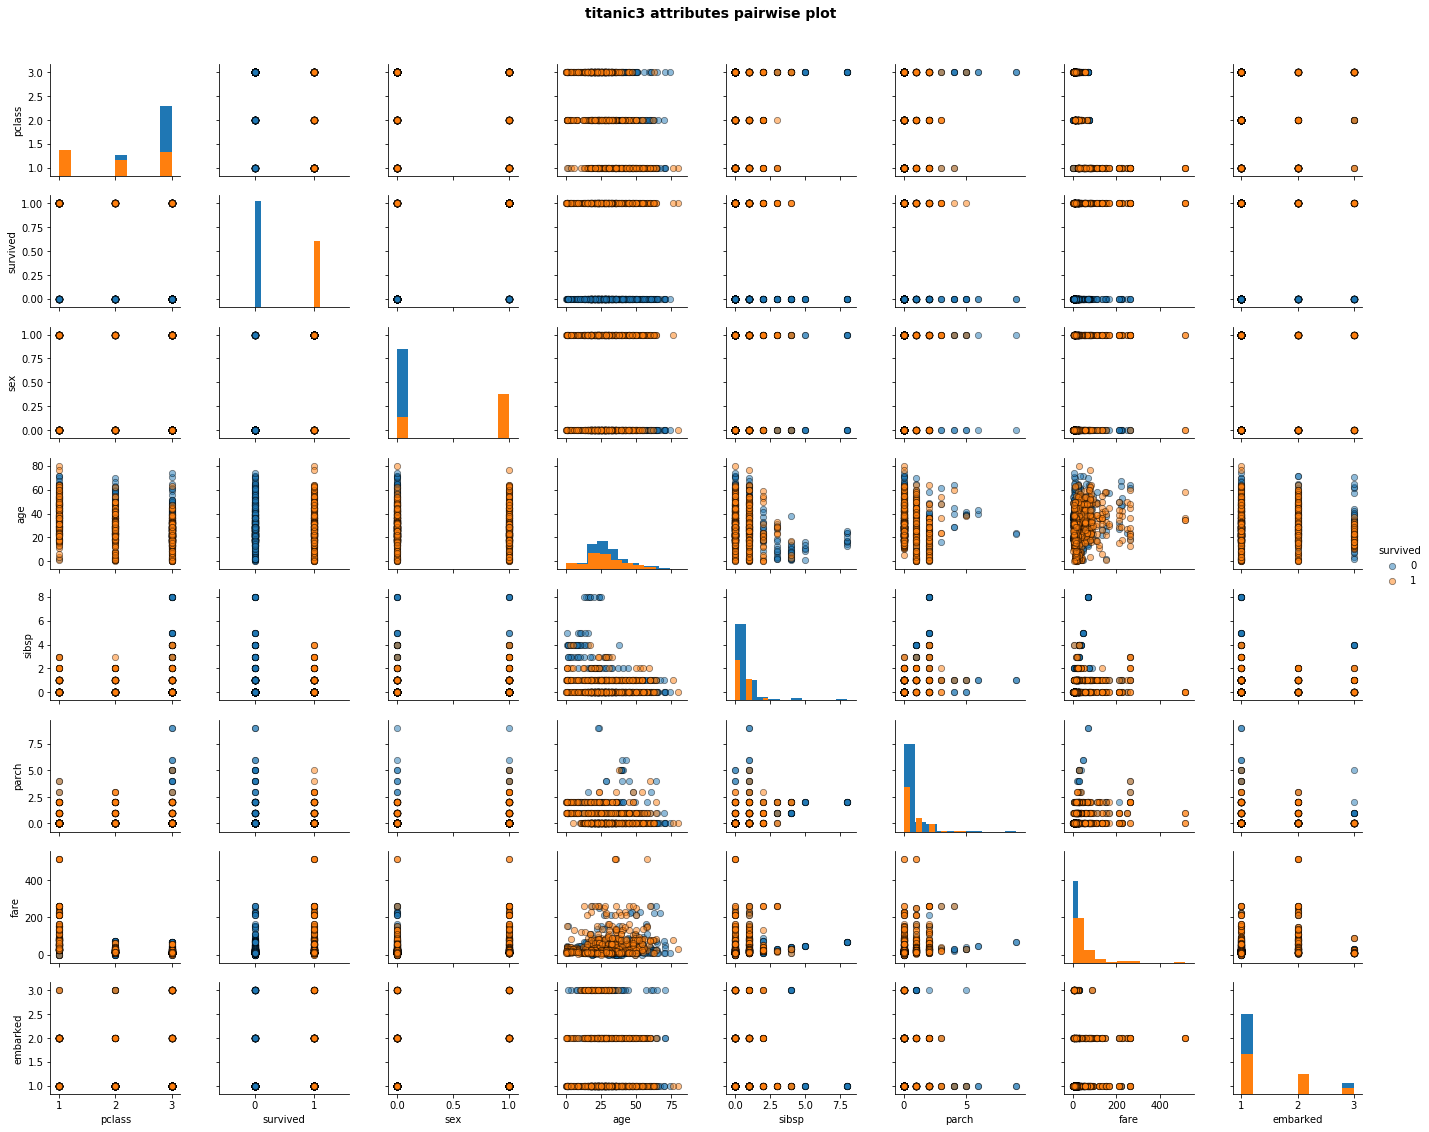

In [464]:
pp = sns.pairplot(df, height=2, aspect=1.2, hue='survived', diag_kind='hist',
                  plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor': 'k'})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot_hist.png')  
plt.show()